## Below is the master data set and the summary of the insights and visualizations of said master dataset.

In [2]:
import pandas as pd
import requests 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

twitter_archive_master.sample(20)

,Unnamed: 0,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dog Rating,retweet_count,full_text,favorite_count,display_text_range,created_at,jpg_url,Breed Prediction 1,Conf level 1
529,1123,730427201120833536,2016-05-11 15:59:50,https://twitter.com/dog_rates/status/730427201...,11,10,Crystal,doggo,1176.0,This is Crystal. She's flawless. Really wants ...,3809.0,"[0, 98]",2016-05-11 15:59:50,https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg,Eskimo dog,0.682082
2978,6034,706291001778950144,2016-03-06 01:31:11,https://twitter.com/dog_rates/status/706291001...,11,10,None,pupper,522.0,When you're just relaxin and having a swell ti...,1861.0,"[0, 130]",2016-03-06 01:31:11,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,Border terrier,0.587101
2445,4903,855851453814013952,2017-04-22 18:31:02,https://twitter.com/dog_rates/status/855851453...,13,10,None,pupper,19196.0,Here's a puppo participating in the #ScienceMa...,47844.0,"[0, 134]",2017-04-22 18:31:02,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,Flat-coated retriever,0.321676
3701,7459,826204788643753985,2017-01-30 23:05:46,http://us.blastingnews.com/news/2017/01/kentuc...,13,10,None,puppo,1075.0,"Here's a little more info on Dew, your favorit...",5361.0,"[0, 116]",2017-01-30 23:05:46,https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg,Labrador retriever,0.782058
4131,8358,708130923141795840,2016-03-11 03:22:23,https://twitter.com/dog_rates/status/708130923...,11,10,None,puppo,943.0,Please stop sending in non canines like this G...,3707.0,"[0, 140]",2016-03-11 03:22:23,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,French bulldog,0.710354
3845,7765,786595970293370880,2016-10-13 15:54:28,https://twitter.com/dog_rates/status/786595970...,11,10,Dale,puppo,3601.0,This is Dale. He's a real spookster. Did me qu...,10497.0,"[0, 95]",2016-10-13 15:54:28,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,Pembroke,0.709512
1557,3162,772102971039580160,2016-09-03 16:04:27,https://twitter.com/dog_rates/status/772102971...,11,10,Penny,floofer,1065.0,This is Penny. She's an OU cheerleader. About ...,4448.0,"[0, 107]",2016-09-03 16:04:27,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,Pembroke,0.541780
3847,7768,786233965241827333,2016-10-12 15:55:59,https://twitter.com/dog_rates/status/786233965...,11,10,Mattie,puppo,5571.0,This is Mattie. She's extremely dangerous. Wil...,17178.0,"[0, 117]",2016-10-12 15:55:59,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,Labrador retriever,0.478193
4014,8146,739485634323156992,2016-06-05 15:54:48,https://twitter.com/dog_rates/status/739485634...,6,10,Kyle,puppo,3309.0,This is Kyle. He's a heavy drinker and an avid...,7887.0,"[0, 113]",2016-06-05 15:54:48,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,Walker hound,0.640256
4127,8350,708738143638450176,2016-03-12 19:35:15,https://twitter.com/dog_rates/status/708738143...,11,10,Coco,puppo,917.0,This is Coco. She gets to stay on the Bachelor...,2997.0,"[0, 107]",2016-03-12 19:35:15,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,Pomeranian,0.933457


### Insight #1: What are the top 10 most common dog breeds?

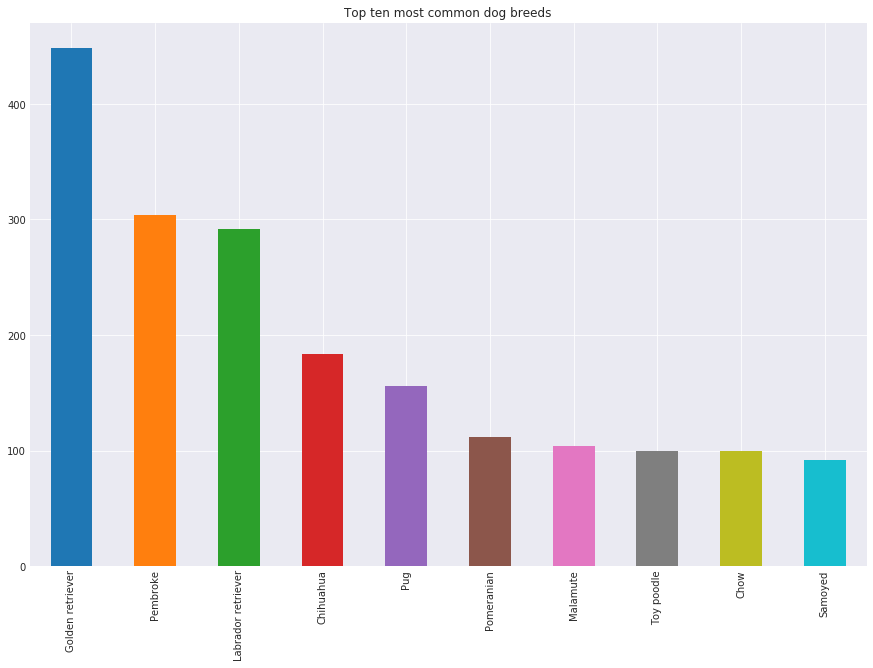

In [8]:
# Defining the size of the chart.

plt.figure(figsize=(15,10))
sns.set_style("darkgrid")

# Giving the chart a title

plt.title('Top ten most common dog breeds')

# Feeding in the variable from above to plot a bar chart. 

top_breed = twitter_archive_master['Breed Prediction 1'].value_counts()[:10].plot(kind='bar')

> As we can see above, the top ten most common breeds are Golden Retriever, Pembroke, Labrador Retriever, Chihuahua, Pug, Pomeranian, Malamute, Chow, Toy Poodle, and Samoyed. Everyone seems to really love Golden Retrievers.

### Insight #2: What tweet was favorited the most?

In [5]:
# Finding the row with the highest favorite count in the 'favorite_count' column.

twitter_archive_master.loc[twitter_archive_master['favorite_count'].idxmax()]

Unnamed: 0                                                          413
tweet_id                                             822872901745569793
timestamp                                           2017-01-21 18:26:02
expanded_urls         https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
Dog Rating                                                        doggo
retweet_count                                                     48265
full_text             Here's a super supportive puppo participating ...
favorite_count                                                   132810
display_text_range                                              [0, 87]
created_at                                          2017-01-21 18:26:02
jpg_url                 https://pbs.twimg.com/media/C2tugXLXgAAr

> With over thirteen thousand retweets, we can officially say that this doggo is a THE favorite!

### Insight #3: What tweet was retweeted the least?

In [6]:
# Finding the row with the lowest retweet count in 'retweet_count'.

twitter_archive_master.loc[twitter_archive_master['retweet_count'].idxmin()]

Unnamed: 0                                                         2339
tweet_id                                             666102155909144576
timestamp                                           2015-11-16 03:55:04
expanded_urls         https://twitter.com/dog_rates/status/666102155...
rating_numerator                                                     11
rating_denominator                                                   10
name                                                               None
Dog Rating                                                        doggo
retweet_count                                                        16
full_text             Oh my. Here you are seeing an Adobe Setter giv...
favorite_count                                                       81
display_text_range                                             [0, 128]
created_at                                          2015-11-16 03:55:04
jpg_url                 https://pbs.twimg.com/media/CT54YGiWUAEZ

> All doggos deserve more retweets! This one only had 81, so sad.

## Visualization, insight #4: What was the favorite count over time? At what point in time was the highest favorite count?

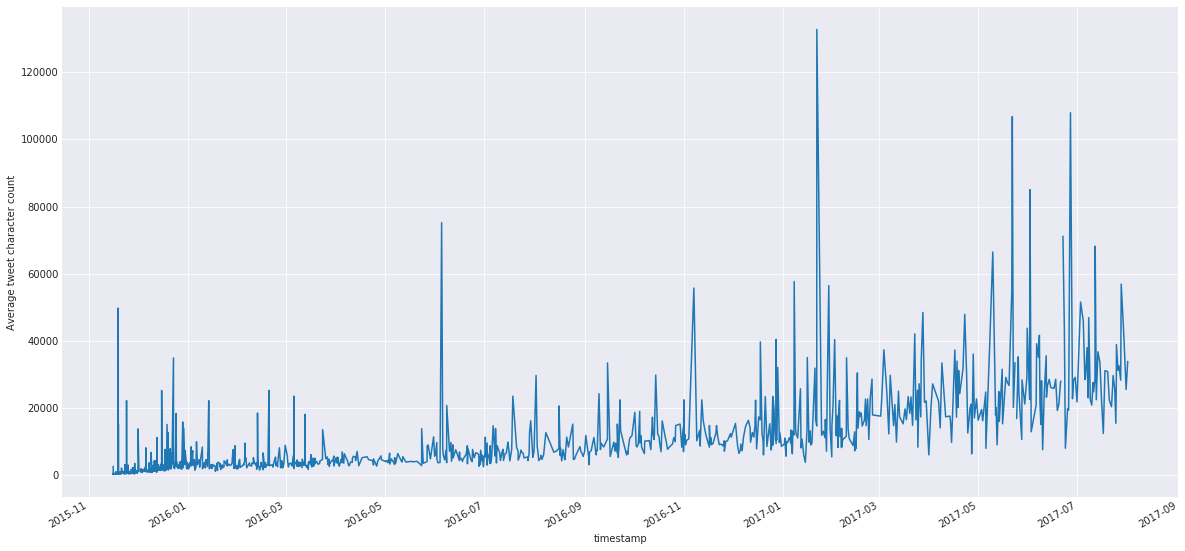

In [7]:
# Defining the chart size and background color.

plt.figure(figsize=(20,10))
sns.set_style("darkgrid")

# Giving the chart labels.

plt.xlabel('Nov 15th 2015-August 8th 2017')
plt.ylabel('Average tweet character count')

# Converting the column to datetime, see the note above for an explanation.

twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

# Visualizing by groupby() with 'timestamp' and 'favorite count'.

twitter_archive_master.groupby(twitter_archive_master['timestamp'])['favorite_count'].max().plot()

> We can see that there is an upward trend overtime people 'favoriting' a tweet. In Feburuary the favorite count reached over 12,000!